# Loan Approval Prediction - Exploratory Data Analysis

## Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban, and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. 

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. To automate this process, they have given a problem to identify the customers' segments, those are eligible for loan amount so that they can specifically target these customers.

**The goal of this project is to predict whether a loan would be approved or not.**

## Importing Libraries

We'll import all necessary libraries for data analysis and visualization.

In [1]:
# Importing Libraries
import pandas as pd                       # for reading the files
import numpy as np                        # for creating multi-dimensional-array
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for data visualization
import warnings                          # for ignoring the warnings
from statistics import mean 
from sklearn import tree
from sklearn import metrics
warnings.filterwarnings("ignore")
%matplotlib inline

# Additional imports for comprehensive analysis
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Import the Data Files

Let's load our dataset and examine its structure.

In [2]:
# Load the dataset
data = pd.read_csv('../data/LoanApprovalPrediction.csv')

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
data.head()

Dataset Shape: (600, 12)

First 5 rows:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,Yes,1,4459,98,360,1.0,Semiurban,Y
1,Female,No,1,Graduate,No,9581,3113,82,240,1.0,Rural,Y
2,Male,No,3+,Graduate,Yes,2220,2113,73,360,0.0,Semiurban,N
3,Male,No,1,Not Graduate,Yes,1709,-402,205,240,1.0,Semiurban,Y
4,Male,Yes,0,Graduate,Yes,7045,1630,118,240,0.0,Urban,Y


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print("="*50)
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            600 non-null    object 
 2   Dependents         600 non-null    object 
 3   Education          600 non-null    object 
 4   Self_Employed      600 non-null    object 
 5   ApplicantIncome    600 non-null    int64  
 6   CoapplicantIncome  600 non-null    int64  
 7   LoanAmount         600 non-null    int64  
 8   Loan_Amount_Term   600 non-null    int64  
 9   Credit_History     600 non-null    float64
 10  Property_Area      600 non-null    object 
 11  Loan_Status        600 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 56.4+ KB


In [4]:
# Statistical summary of numerical variables
print("Statistical Summary:")
print("="*50)
data.describe()

Statistical Summary:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,600.000000,600.000000,600.000000,600.00000,600.000000
mean,5145.351667,1992.911667,150.253333,224.40000,0.818333
std,2006.041588,1459.413842,49.503436,87.82651,0.385891
min,-842.000000,-2529.000000,0.000000,120.00000,0.000000
25%,3780.000000,1053.500000,117.000000,180.00000,1.000000
50%,5118.500000,2000.000000,148.000000,180.00000,1.000000
75%,6470.000000,2977.000000,183.000000,240.00000,1.000000
max,11386.000000,6706.000000,346.000000,360.00000,1.000000


## Data Overview and Quality Assessment

Let's examine the data types and check for missing values.

In [5]:
# Check data types
print("Data Types:")
print("="*30)
print(data.dtypes)
print("\n")

# Check for missing values
print("Missing Values:")
print("="*30)
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

Data Types:
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [6]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check unique values for categorical variables
print("\nUnique values in categorical columns:")
print("="*40)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

Number of duplicate rows: 0

Unique values in categorical columns:
Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: ['0' '1' '3+' '2']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['Yes' 'No']
Property_Area: ['Semiurban' 'Rural' 'Urban']
Loan_Status: ['Y' 'N']


## Univariate Analysis
### Examining each variable individually

Let's start with our target variable - Loan Status.

Loan Status Distribution:
Loan_Status
Y    509
N     91
Name: count, dtype: int64


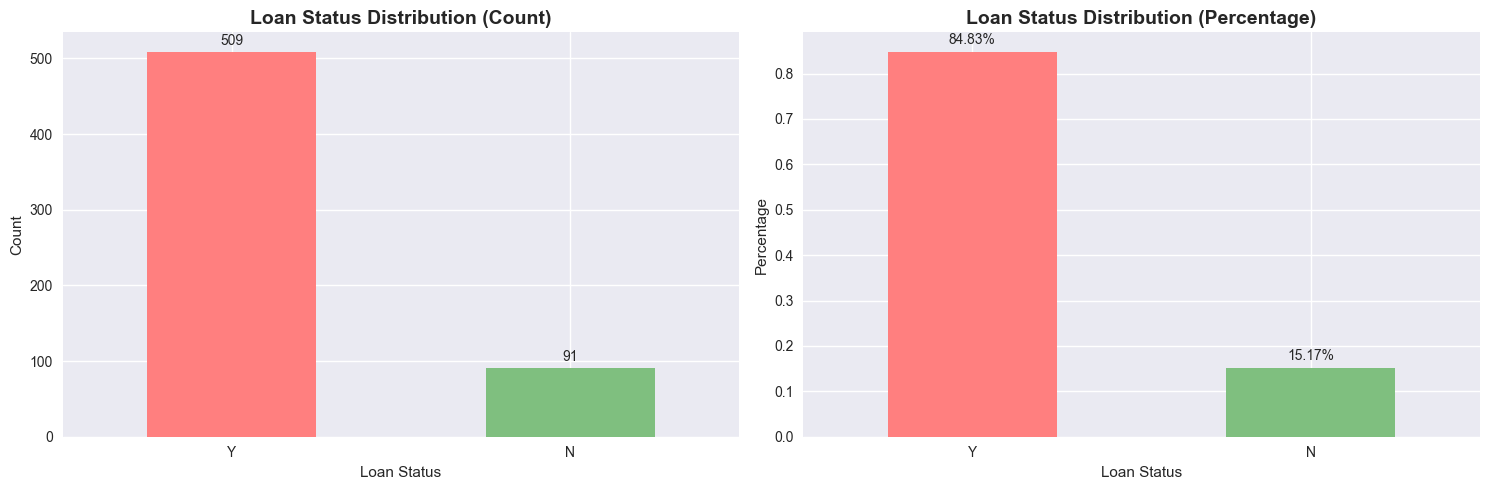

In [7]:
# Target Variable Analysis - Loan Status
print("Loan Status Distribution:")
print("="*30)
loan_status_counts = data['Loan_Status'].value_counts()
print(loan_status_counts)

# Create visualizations for target variable
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
loan_status_counts.plot(kind='bar', ax=axes[0], color=['#ff7f7f', '#7fbf7f'])
axes[0].set_title('Loan Status Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Percentage plot
loan_status_pct = data['Loan_Status'].value_counts(normalize=True)
loan_status_pct.plot(kind='bar', ax=axes[1], color=['#ff7f7f', '#7fbf7f'])
axes[1].set_title('Loan Status Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=0)

# Add value labels on bars
for i, v in enumerate(loan_status_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom')

for i, v in enumerate(loan_status_pct.values):
    axes[1].text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Analysis of Categorical Variables

Let's examine the distribution of all categorical variables.

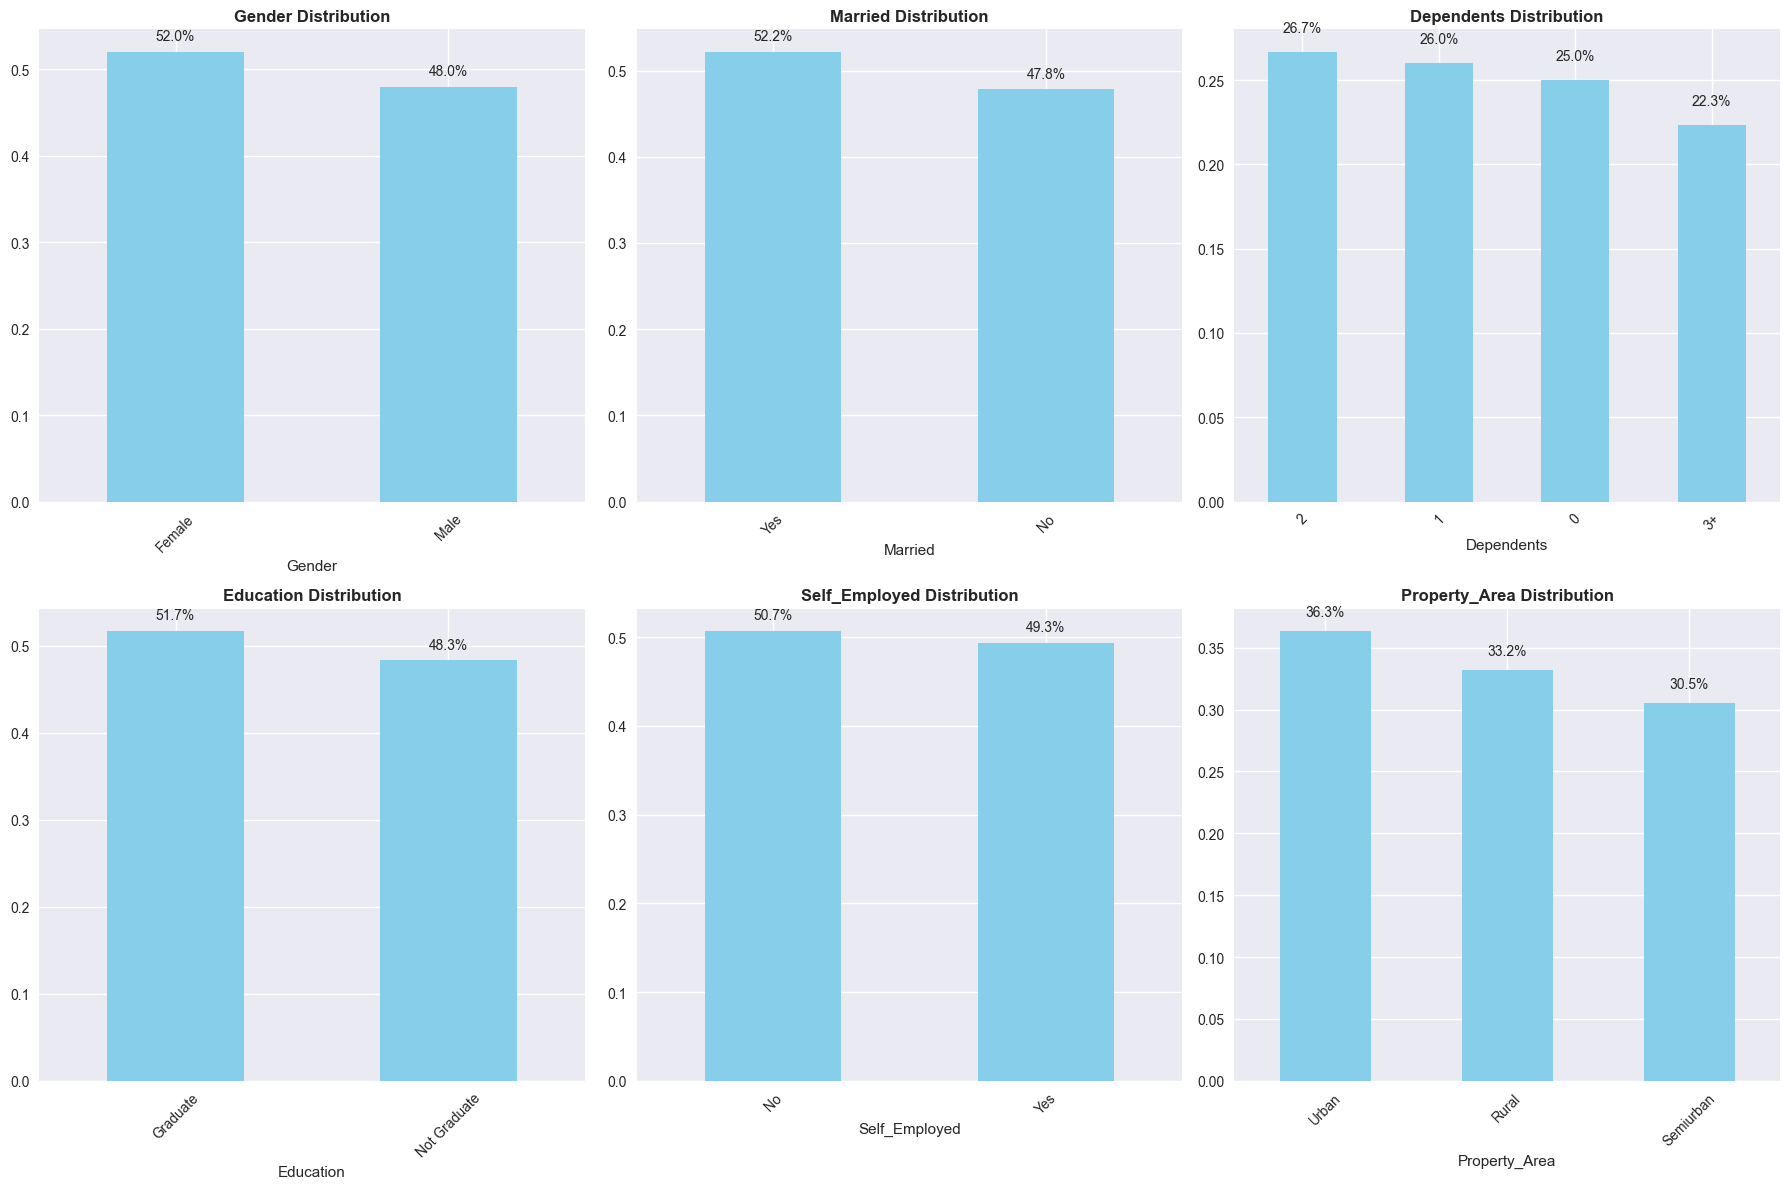

Key Insights from Categorical Variables:
• 52.0% of applicants are Female
• 52.2% of applicants are Yes
• 51.7% of applicants are Graduates
• 50.7% of applicants are No self-employed
• 36.3% of applicants are from Urban areas


In [8]:
# Plots for Independent Categorical Variables
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    data[var].value_counts(normalize=True).plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{var} Distribution', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for j, v in enumerate(data[var].value_counts(normalize=True).values):
        axes[i].text(j, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print insights
print("Key Insights from Categorical Variables:")
print("="*40)
print(f"• {data['Gender'].value_counts(normalize=True).iloc[0]:.1%} of applicants are {data['Gender'].value_counts().index[0]}")
print(f"• {data['Married'].value_counts(normalize=True).iloc[0]:.1%} of applicants are {data['Married'].value_counts().index[0]}")
print(f"• {data['Education'].value_counts(normalize=True).iloc[0]:.1%} of applicants are {data['Education'].value_counts().index[0]}s")
print(f"• {data['Self_Employed'].value_counts(normalize=True).iloc[0]:.1%} of applicants are {data['Self_Employed'].value_counts().index[0]} self-employed")
print(f"• {data['Property_Area'].value_counts(normalize=True).iloc[0]:.1%} of applicants are from {data['Property_Area'].value_counts().index[0]} areas")

Credit History Analysis:
Credit History Distribution:
Good Credit (1.0): 491 (81.8%)
Poor Credit (0.0): 109 (18.2%)


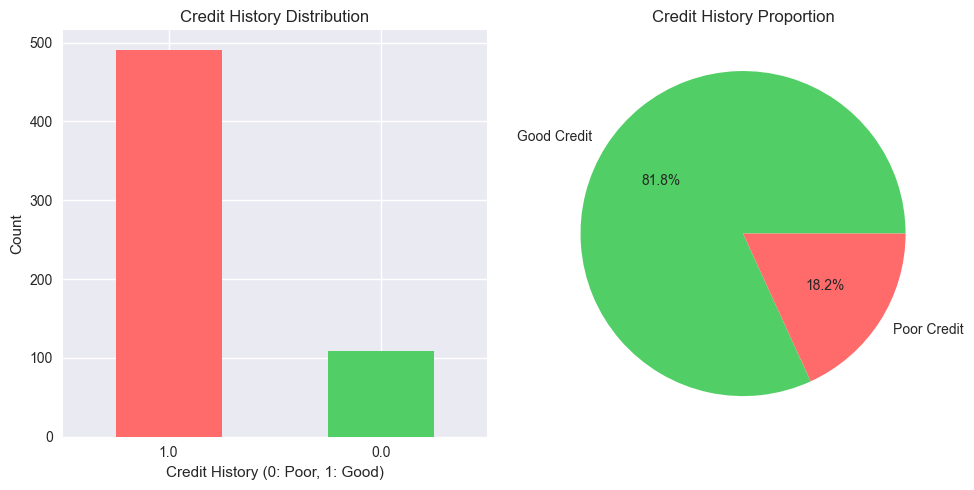

In [9]:
# Credit History Analysis
print("Credit History Analysis:")
print("="*30)
credit_counts = data['Credit_History'].value_counts()
print("Credit History Distribution:")
print(f"Good Credit (1.0): {credit_counts.get(1.0, 0)} ({credit_counts.get(1.0, 0)/len(data):.1%})")
print(f"Poor Credit (0.0): {credit_counts.get(0.0, 0)} ({credit_counts.get(0.0, 0)/len(data):.1%})")

# Visualize Credit History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
credit_counts.plot(kind='bar', color=['#ff6b6b', '#51cf66'])
plt.title('Credit History Distribution')
plt.xlabel('Credit History (0: Poor, 1: Good)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(credit_counts.values, labels=['Good Credit', 'Poor Credit'], autopct='%1.1f%%', 
        colors=['#51cf66', '#ff6b6b'])
plt.title('Credit History Proportion')

plt.tight_layout()
plt.show()

### Analysis of Numerical Variables

Let's examine the distribution of numerical variables including income and loan amount.

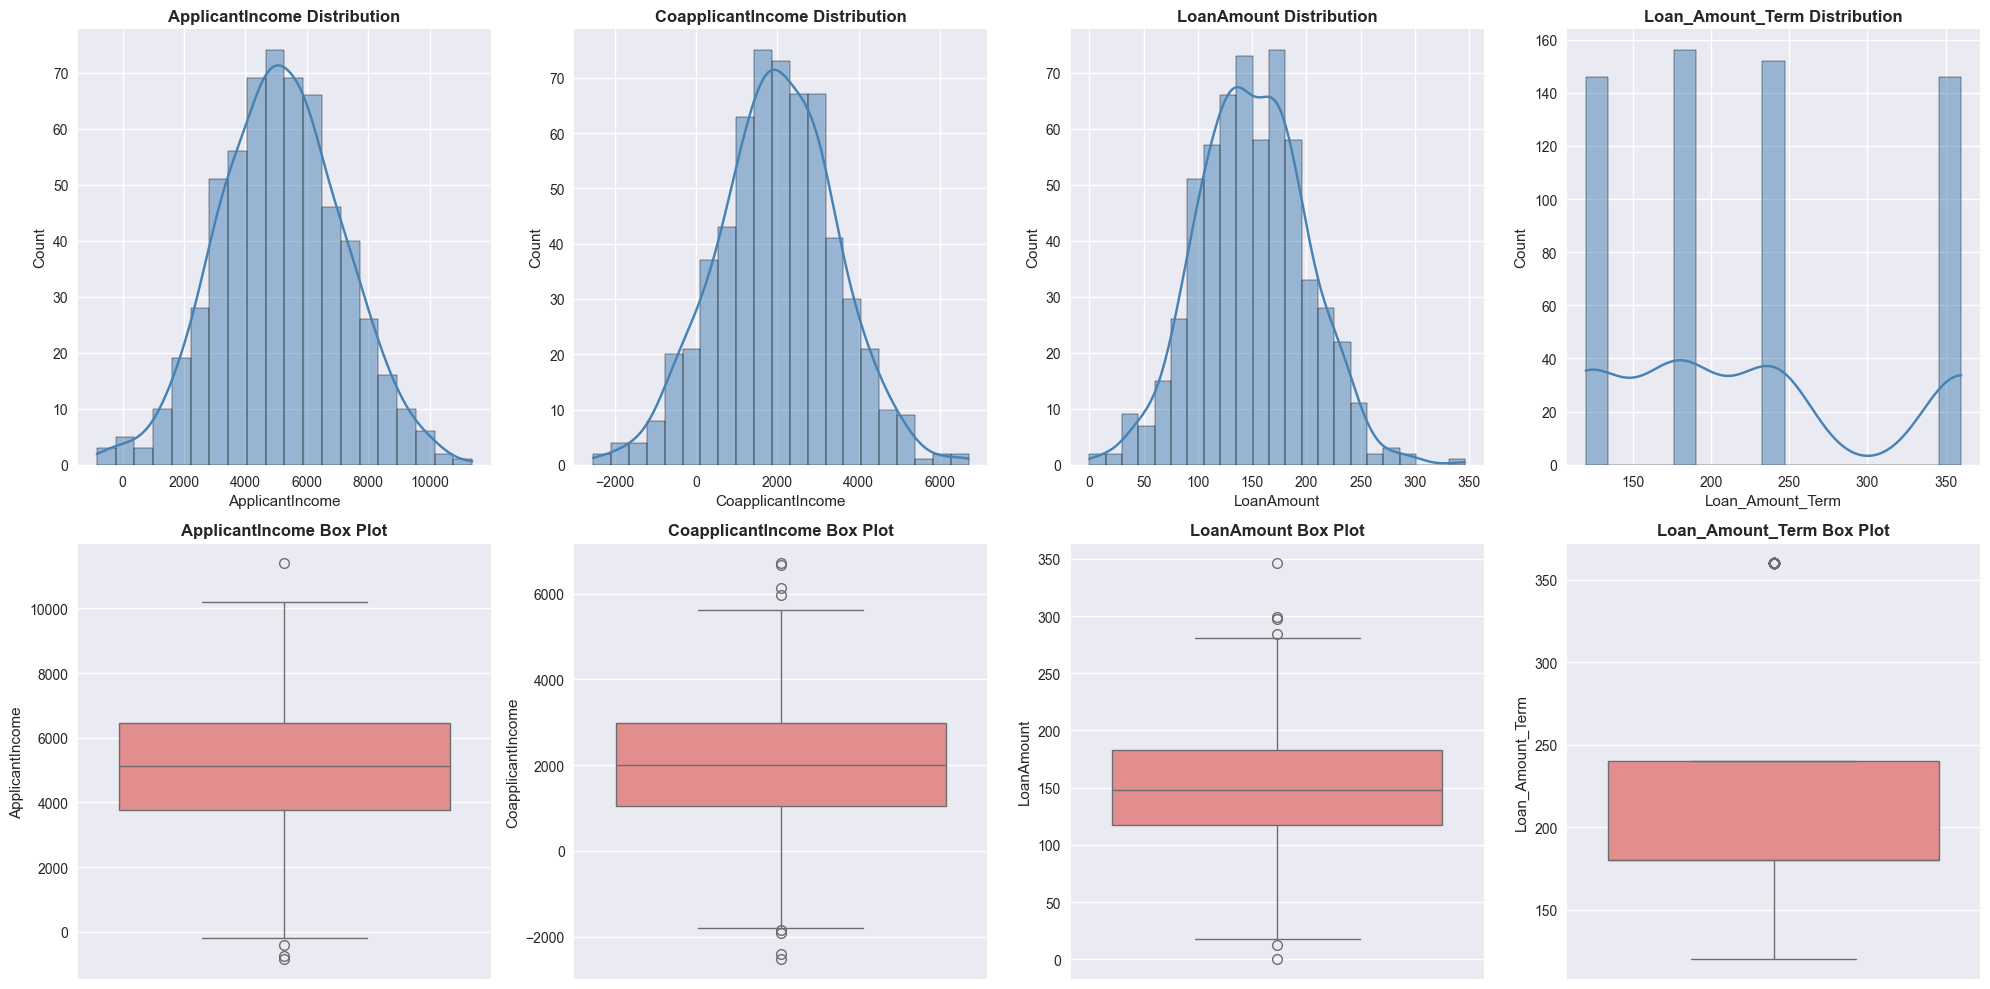

Statistical Summary of Numerical Variables:

ApplicantIncome:
  Mean: 5145.35
  Median: 5118.50
  Std: 2006.04
  Min: -842.00
  Max: 11386.00
  Skewness: -0.01

CoapplicantIncome:
  Mean: 1992.91
  Median: 2000.00
  Std: 1459.41
  Min: -2529.00
  Max: 6706.00
  Skewness: -0.03

LoanAmount:
  Mean: 150.25
  Median: 148.00
  Std: 49.50
  Min: 0.00
  Max: 346.00
  Skewness: 0.12

Loan_Amount_Term:
  Mean: 224.40
  Median: 180.00
  Std: 87.83
  Min: 120.00
  Max: 360.00
  Skewness: 0.46


In [10]:
# Numerical variables analysis
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, var in enumerate(numerical_vars):
    # Distribution plot
    sns.histplot(data[var].dropna(), kde=True, ax=axes[0, i], color='steelblue')
    axes[0, i].set_title(f'{var} Distribution', fontweight='bold')
    
    # Box plot
    sns.boxplot(y=data[var], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'{var} Box Plot', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary
print("Statistical Summary of Numerical Variables:")
print("="*50)
for var in numerical_vars:
    print(f"\n{var}:")
    print(f"  Mean: {data[var].mean():.2f}")
    print(f"  Median: {data[var].median():.2f}")
    print(f"  Std: {data[var].std():.2f}")
    print(f"  Min: {data[var].min():.2f}")
    print(f"  Max: {data[var].max():.2f}")
    print(f"  Skewness: {data[var].skew():.2f}")

Detailed Income Analysis:


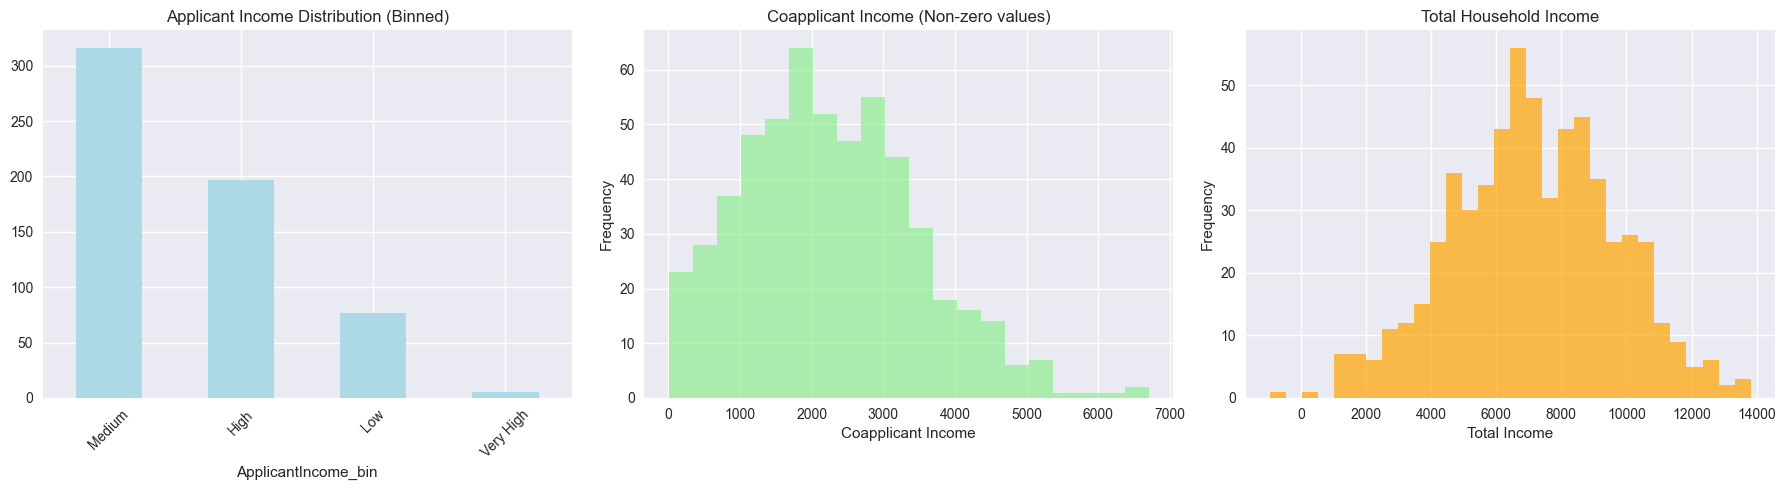

Applicants with no coapplicant income: 0 (0.0%)


In [11]:
# Income analysis with more detail
print("Detailed Income Analysis:")
print("="*30)

# Create income bins for analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Applicant Income Analysis
income_bins = [0, 3000, 6000, 10000, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High']
data['ApplicantIncome_bin'] = pd.cut(data['ApplicantIncome'], bins=income_bins, labels=income_labels)

data['ApplicantIncome_bin'].value_counts().plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title('Applicant Income Distribution (Binned)')
axes[0].tick_params(axis='x', rotation=45)

# Coapplicant Income Analysis (excluding zeros)
coapplicant_nonzero = data[data['CoapplicantIncome'] > 0]['CoapplicantIncome']
axes[1].hist(coapplicant_nonzero, bins=20, color='lightgreen', alpha=0.7)
axes[1].set_title('Coapplicant Income (Non-zero values)')
axes[1].set_xlabel('Coapplicant Income')
axes[1].set_ylabel('Frequency')

# Total Income Analysis
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
axes[2].hist(data['TotalIncome'], bins=30, color='orange', alpha=0.7)
axes[2].set_title('Total Household Income')
axes[2].set_xlabel('Total Income')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Applicants with no coapplicant income: {(data['CoapplicantIncome'] == 0).sum()} ({(data['CoapplicantIncome'] == 0).mean():.1%})")

## Bivariate Analysis
### Examining relationships between variables

Let's analyze how each variable relates to loan approval status.

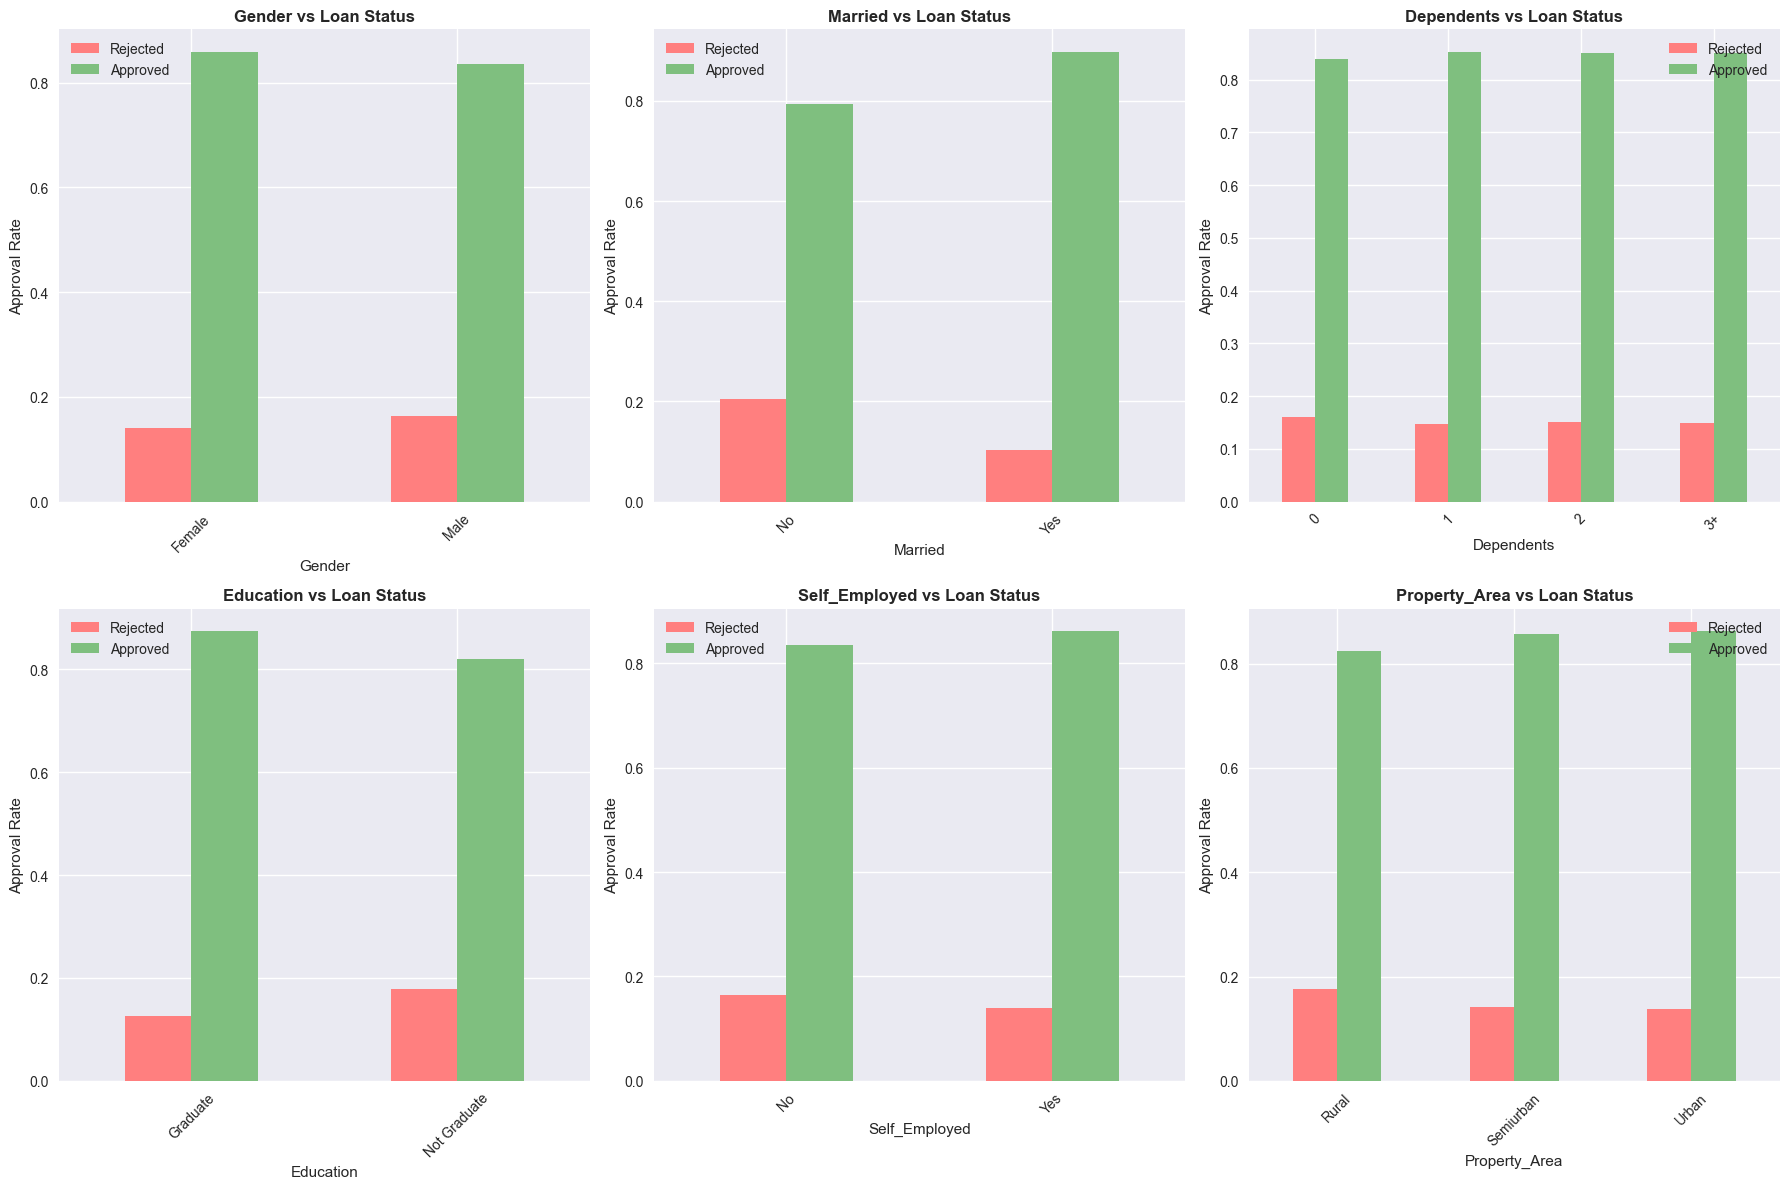

Loan Approval Rates by Category:

Gender:
  Female: 85.9%
  Male: 83.7%

Married:
  No: 79.4%
  Yes: 89.8%

Dependents:
  0: 84.0%
  1: 85.3%
  2: 85.0%
  3+: 85.1%

Education:
  Graduate: 87.4%
  Not Graduate: 82.1%

Self_Employed:
  No: 83.6%
  Yes: 86.1%

Property_Area:
  Rural: 82.4%
  Semiurban: 85.8%
  Urban: 86.2%


In [12]:
# Categorical variables vs Loan Status
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    # Create cross-tabulation
    crosstab = pd.crosstab(data[var], data['Loan_Status'])
    
    # Calculate percentages
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Plot
    crosstab_pct.plot(kind='bar', ax=axes[i], color=['#ff7f7f', '#7fbf7f'])
    axes[i].set_title(f'{var} vs Loan Status', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Approval Rate')
    axes[i].legend(['Rejected', 'Approved'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print approval rates for each category
print("Loan Approval Rates by Category:")
print("="*40)
for var in categorical_vars:
    crosstab = pd.crosstab(data[var], data['Loan_Status'])
    approval_rates = crosstab['Y'] / (crosstab['Y'] + crosstab['N'])
    print(f"\n{var}:")
    for category, rate in approval_rates.items():
        print(f"  {category}: {rate:.1%}")

Credit History Impact on Loan Approval:
Cross-tabulation:
Loan_Status      N    Y
Credit_History         
0.0             80   29
1.0             11  480

Approval Rates:
Poor Credit (0.0): 26.6%
Good Credit (1.0): 97.8%


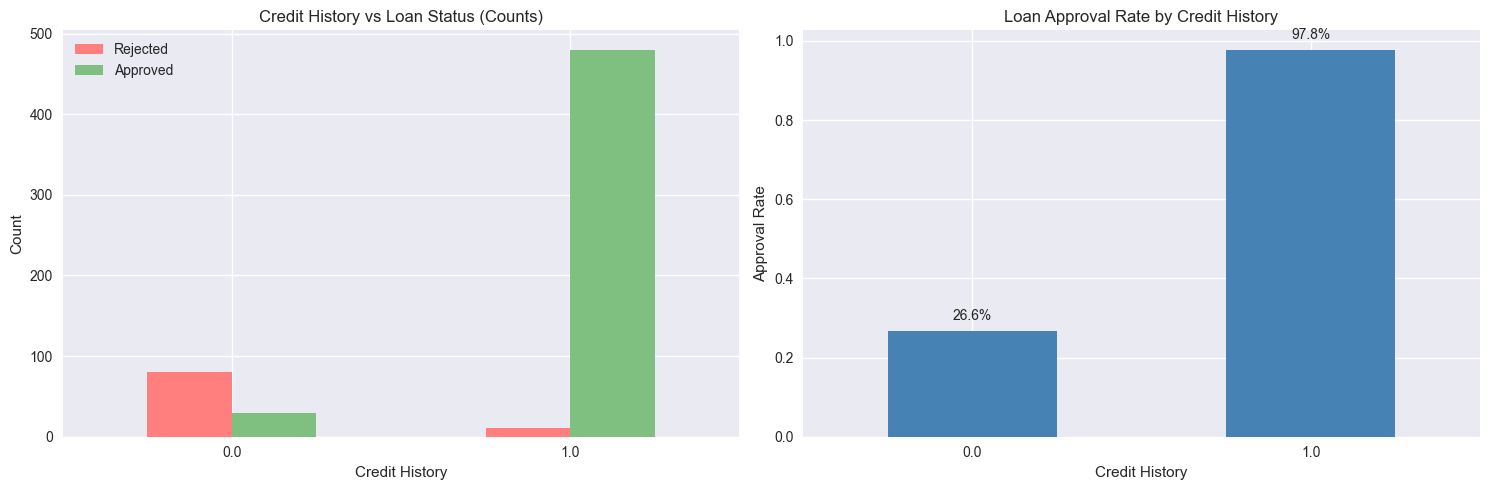

In [13]:
# Credit History vs Loan Status - Special Analysis
print("Credit History Impact on Loan Approval:")
print("="*40)

credit_crosstab = pd.crosstab(data['Credit_History'], data['Loan_Status'])
print("Cross-tabulation:")
print(credit_crosstab)

# Calculate approval rates
approval_rates = credit_crosstab['Y'] / (credit_crosstab['Y'] + credit_crosstab['N'])
print(f"\nApproval Rates:")
print(f"Poor Credit (0.0): {approval_rates[0.0]:.1%}")
print(f"Good Credit (1.0): {approval_rates[1.0]:.1%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Stacked bar chart
credit_crosstab.plot(kind='bar', ax=axes[0], color=['#ff7f7f', '#7fbf7f'])
axes[0].set_title('Credit History vs Loan Status (Counts)')
axes[0].set_xlabel('Credit History')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(['Rejected', 'Approved'])

# Approval rate chart
approval_rates.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Loan Approval Rate by Credit History')
axes[1].set_xlabel('Credit History')
axes[1].set_ylabel('Approval Rate')
axes[1].tick_params(axis='x', rotation=0)

# Add percentage labels
for i, v in enumerate(approval_rates.values):
    axes[1].text(i, v + 0.02, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Income Analysis vs Loan Status:


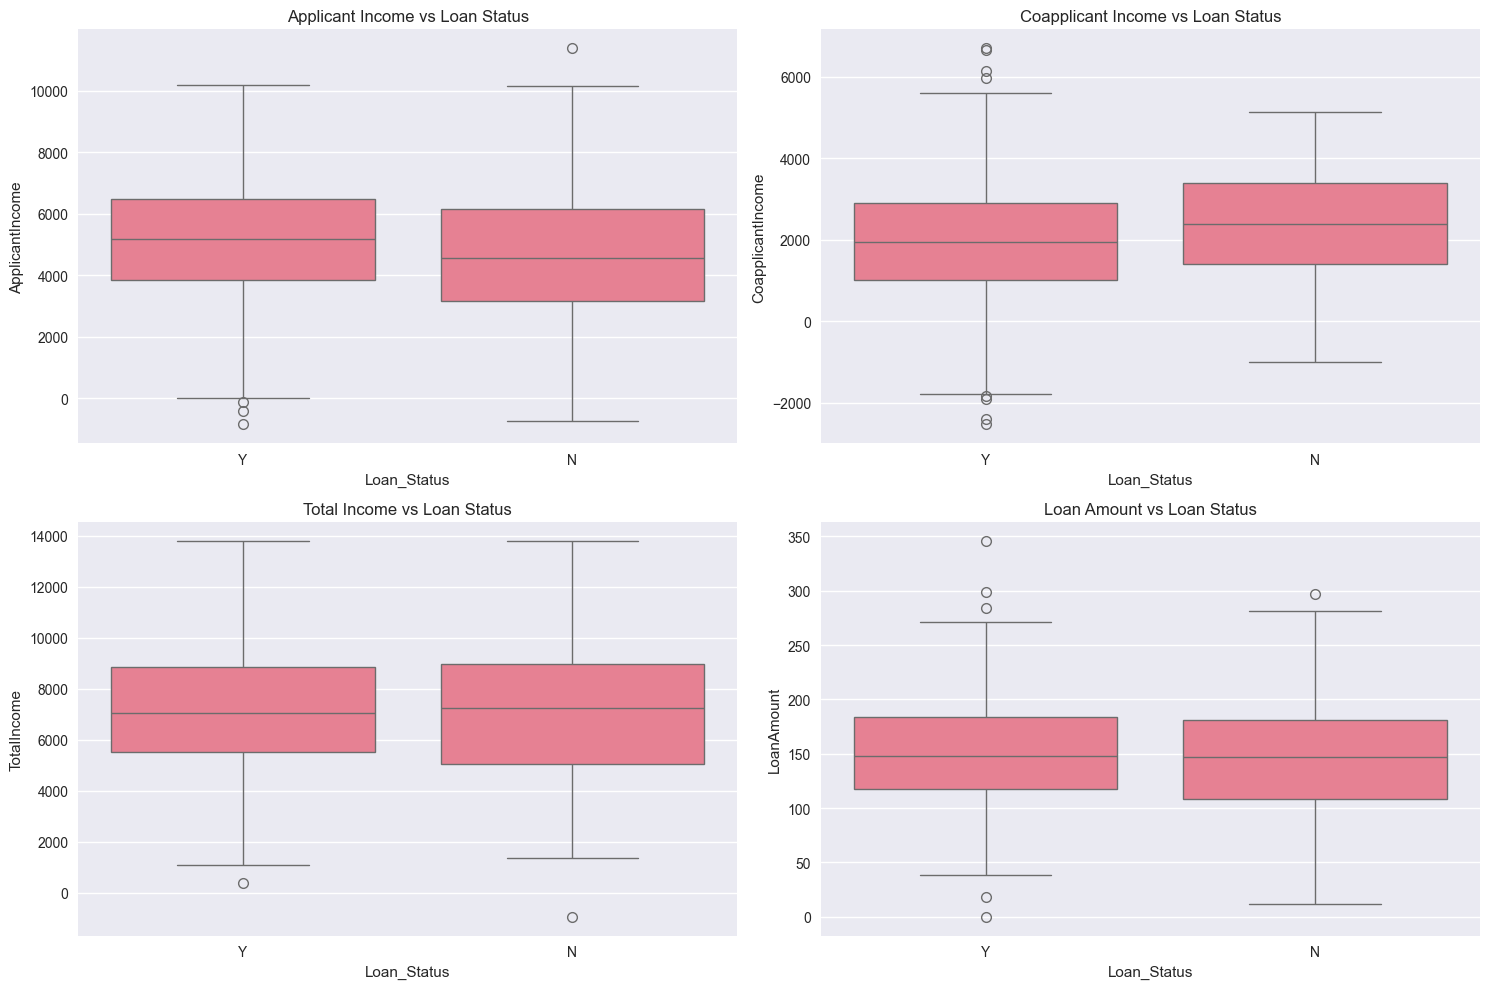

Income Statistics by Loan Status:
----------------------------------------
            ApplicantIncome         CoapplicantIncome          TotalIncome  \
                       mean  median              mean  median         mean   
Loan_Status                                                                  
N               4784.263736  4553.0       2314.417582  2398.0  7098.681319   
Y               5209.907662  5172.0       1935.432220  1944.0  7145.339882   

                     LoanAmount         
             median        mean median  
Loan_Status                             
N            7245.0  145.934066  147.0  
Y            7033.0  151.025540  148.0  


In [14]:
# Income vs Loan Status Analysis
print("Income Analysis vs Loan Status:")
print("="*35)

# Applicant Income by Loan Status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plots for income comparison
sns.boxplot(data=data, x='Loan_Status', y='ApplicantIncome', ax=axes[0, 0])
axes[0, 0].set_title('Applicant Income vs Loan Status')

sns.boxplot(data=data, x='Loan_Status', y='CoapplicantIncome', ax=axes[0, 1])
axes[0, 1].set_title('Coapplicant Income vs Loan Status')

sns.boxplot(data=data, x='Loan_Status', y='TotalIncome', ax=axes[1, 0])
axes[1, 0].set_title('Total Income vs Loan Status')

sns.boxplot(data=data, x='Loan_Status', y='LoanAmount', ax=axes[1, 1])
axes[1, 1].set_title('Loan Amount vs Loan Status')

plt.tight_layout()
plt.show()

# Statistical comparison
print("Income Statistics by Loan Status:")
print("-" * 40)
income_stats = data.groupby('Loan_Status')[['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'LoanAmount']].agg(['mean', 'median'])
print(income_stats)

Income Binning Analysis:


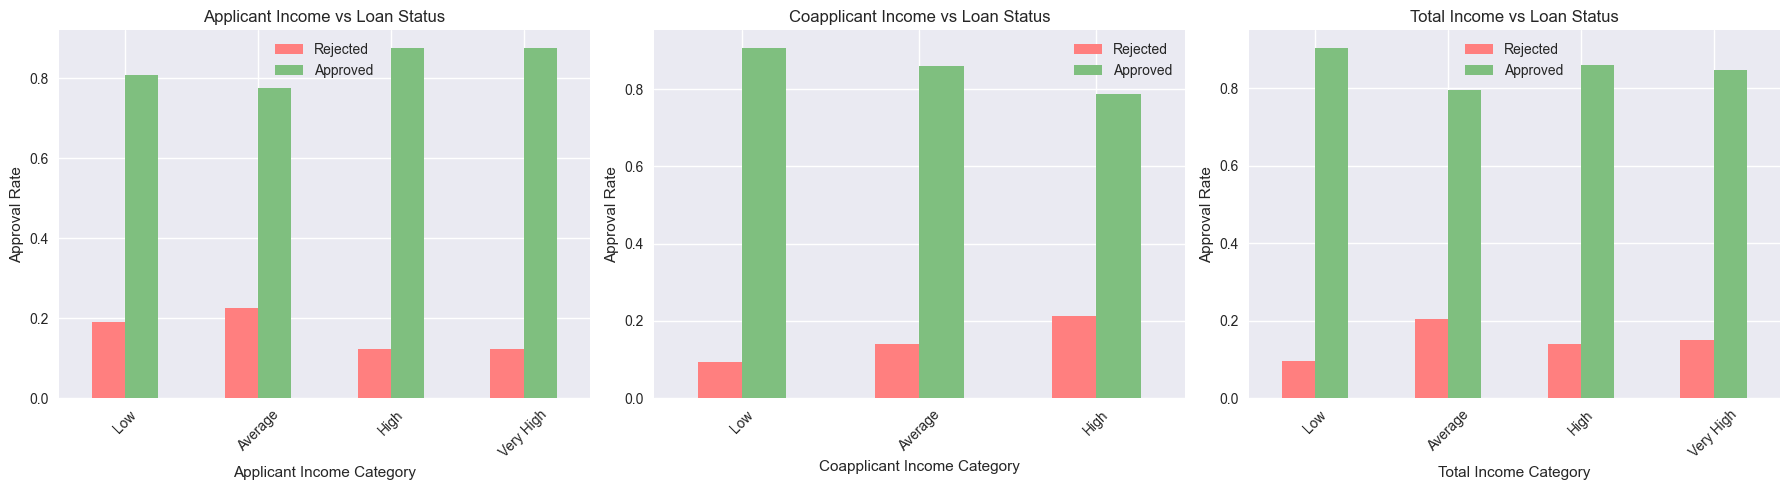

In [15]:
# Income Binning Analysis
print("Income Binning Analysis:")
print("="*30)

# Applicant Income Bins
income_bins = [0, 2500, 4000, 6000, float('inf')]
income_labels = ['Low', 'Average', 'High', 'Very High']
data['Income_bin'] = pd.cut(data['ApplicantIncome'], bins=income_bins, labels=income_labels)

# Coapplicant Income Bins
coapp_bins = [0, 1000, 3000, float('inf')]
coapp_labels = ['Low', 'Average', 'High']
data['Coapplicant_Income_bin'] = pd.cut(data['CoapplicantIncome'], bins=coapp_bins, labels=coapp_labels)

# Total Income Bins
total_bins = [0, 2500, 4000, 6000, float('inf')]
total_labels = ['Low', 'Average', 'High', 'Very High']
data['Total_Income_bin'] = pd.cut(data['TotalIncome'], bins=total_bins, labels=total_labels)

# Plot income bins vs loan status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (income_col, title) in enumerate([('Income_bin', 'Applicant Income'), 
                                        ('Coapplicant_Income_bin', 'Coapplicant Income'),
                                        ('Total_Income_bin', 'Total Income')]):
    crosstab = pd.crosstab(data[income_col], data['Loan_Status'])
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    crosstab_pct.plot(kind='bar', ax=axes[i], color=['#ff7f7f', '#7fbf7f'])
    axes[i].set_title(f'{title} vs Loan Status')
    axes[i].set_xlabel(f'{title} Category')
    axes[i].set_ylabel('Approval Rate')
    axes[i].legend(['Rejected', 'Approved'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Loan Amount Analysis:


<Figure size 800x500 with 0 Axes>

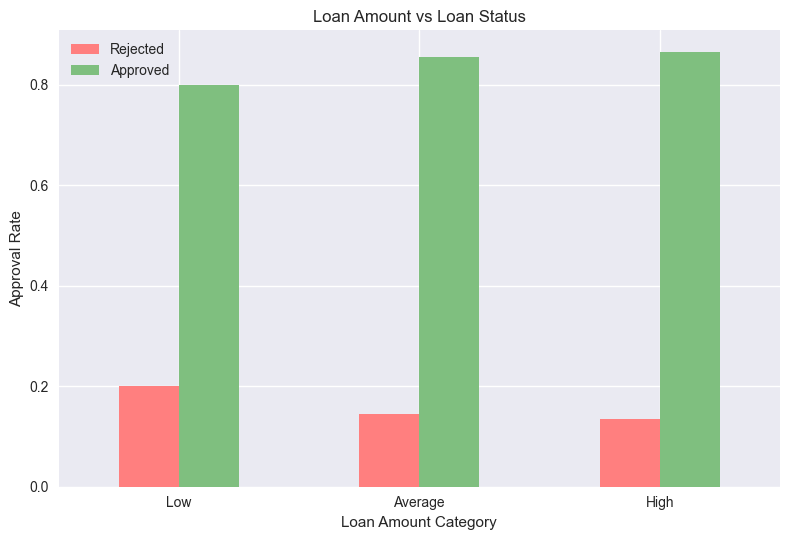

Loan Amount Approval Rates:
Low: 80.0%
Average: 85.5%
High: 86.5%


In [16]:
# Loan Amount Analysis
print("Loan Amount Analysis:")
print("="*25)

# Loan Amount Bins
loan_bins = [0, 100, 200, float('inf')]
loan_labels = ['Low', 'Average', 'High']
data['LoanAmount_bin'] = pd.cut(data['LoanAmount'], bins=loan_bins, labels=loan_labels)

# Plot loan amount bins vs loan status
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(data['LoanAmount_bin'], data['Loan_Status'])
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

crosstab_pct.plot(kind='bar', color=['#ff7f7f', '#7fbf7f'])
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Amount Category')
plt.ylabel('Approval Rate')
plt.legend(['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print loan amount statistics
print("Loan Amount Approval Rates:")
for category in loan_labels:
    if category in crosstab_pct.index:
        approval_rate = crosstab_pct.loc[category, 'Y']
        print(f"{category}: {approval_rate:.1%}")

## Correlation Analysis
### Using Heatmaps to understand relationships

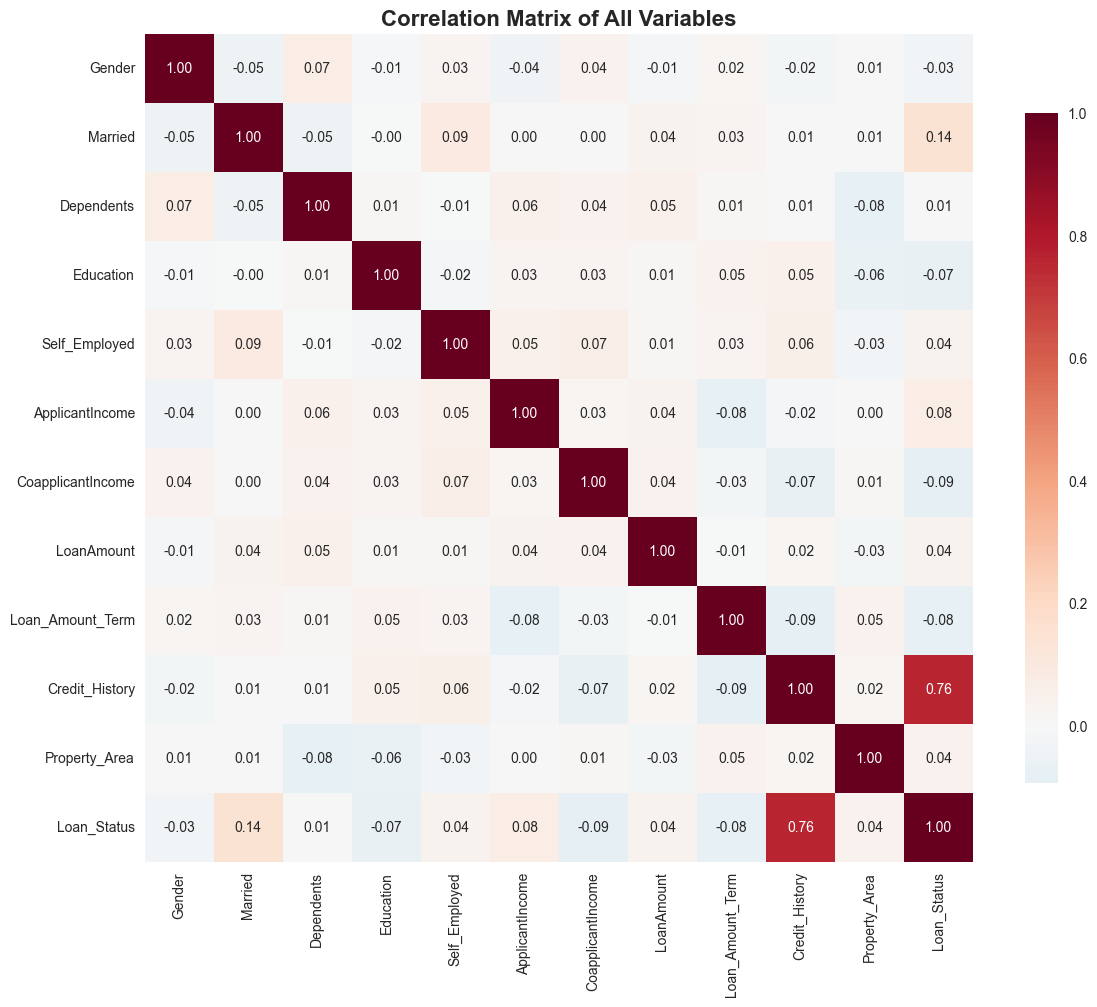

Strongest correlations with Loan Status:
Credit_History: 0.765
Married: 0.144
CoapplicantIncome: 0.093
Loan_Amount_Term: 0.082
ApplicantIncome: 0.076
Education: 0.075
Property_Area: 0.044
LoanAmount: 0.037
Self_Employed: 0.036
Gender: 0.031
Dependents: 0.009


In [17]:
# Prepare data for correlation analysis
# Convert categorical variables to numerical for correlation
data_encoded = data.copy()

# Label encode categorical variables
le = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    if col in data_encoded.columns:
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

# Select relevant columns for correlation
correlation_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                   'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                   'Credit_History', 'Property_Area', 'Loan_Status']

correlation_data = data_encoded[correlation_cols]

# Create correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of All Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations with Loan_Status
print("Strongest correlations with Loan Status:")
print("="*40)
loan_status_corr = correlation_matrix['Loan_Status'].abs().sort_values(ascending=False)
for var, corr in loan_status_corr.items():
    if var != 'Loan_Status':
        print(f"{var}: {corr:.3f}")

In [18]:
# Advanced correlation analysis - focus on top correlations
print("Key Correlation Insights:")
print("="*30)

# Top positive correlations with loan approval
top_positive = correlation_matrix['Loan_Status'].sort_values(ascending=False)
print("Variables positively correlated with loan approval:")
for var, corr in top_positive.items():
    if var != 'Loan_Status' and corr > 0:
        print(f"  {var}: {corr:.3f}")

print("\nVariables negatively correlated with loan approval:")
for var, corr in top_positive.items():
    if var != 'Loan_Status' and corr < 0:
        print(f"  {var}: {corr:.3f}")

# Feature correlation with each other (multicollinearity check)
print(f"\nHighest feature-feature correlations:")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'Loan_Status' and correlation_matrix.columns[j] != 'Loan_Status':
            corr_val = correlation_matrix.iloc[i, j]
            corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], abs(corr_val)))

corr_pairs.sort(key=lambda x: x[2], reverse=True)
for var1, var2, corr in corr_pairs[:5]:
    print(f"  {var1} - {var2}: {corr:.3f}")

Key Correlation Insights:
Variables positively correlated with loan approval:
  Credit_History: 0.765
  Married: 0.144
  ApplicantIncome: 0.076
  Property_Area: 0.044
  LoanAmount: 0.037
  Self_Employed: 0.036
  Dependents: 0.009

Variables negatively correlated with loan approval:
  Gender: -0.031
  Education: -0.075
  Loan_Amount_Term: -0.082
  CoapplicantIncome: -0.093

Highest feature-feature correlations:
  Married - Self_Employed: 0.091
  Loan_Amount_Term - Credit_History: 0.087
  Dependents - Property_Area: 0.082
  ApplicantIncome - Loan_Amount_Term: 0.077
  Gender - Dependents: 0.075


## Key Insights and Summary

Let's summarize our findings from the exploratory data analysis.

In [19]:
# Summary of key insights
print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"• Total number of loan applications: {len(data)}")
print(f"• Overall loan approval rate: {(data['Loan_Status'] == 'Y').mean():.1%}")
print(f"• Missing values in key columns: {data.isnull().sum().sum()} total")

print("\n👥 DEMOGRAPHIC INSIGHTS:")
gender_approval = pd.crosstab(data['Gender'], data['Loan_Status'])
male_approval = gender_approval.loc['Male', 'Y'] / (gender_approval.loc['Male', 'Y'] + gender_approval.loc['Male', 'N'])
female_approval = gender_approval.loc['Female', 'Y'] / (gender_approval.loc['Female', 'Y'] + gender_approval.loc['Female', 'N'])
print(f"• Male approval rate: {male_approval:.1%}")
print(f"• Female approval rate: {female_approval:.1%}")

married_approval = pd.crosstab(data['Married'], data['Loan_Status'])
married_rate = married_approval.loc['Yes', 'Y'] / (married_approval.loc['Yes', 'Y'] + married_approval.loc['Yes', 'N'])
single_rate = married_approval.loc['No', 'Y'] / (married_approval.loc['No', 'Y'] + married_approval.loc['No', 'N'])
print(f"• Married applicants approval rate: {married_rate:.1%}")
print(f"• Single applicants approval rate: {single_rate:.1%}")

print("\n💰 FINANCIAL INSIGHTS:")
print(f"• Average applicant income: ₹{data['ApplicantIncome'].mean():,.0f}")
print(f"• Average loan amount: ₹{data['LoanAmount'].mean():,.0f} thousand")
print(f"• Applicants with coapplicant income: {(data['CoapplicantIncome'] > 0).mean():.1%}")

# Income vs approval analysis
approved_data = data[data['Loan_Status'] == 'Y']
rejected_data = data[data['Loan_Status'] == 'N']
print(f"• Average income (approved): ₹{approved_data['ApplicantIncome'].mean():,.0f}")
print(f"• Average income (rejected): ₹{rejected_data['ApplicantIncome'].mean():,.0f}")

print("\n🏦 CREDIT HISTORY IMPACT:")
credit_approval = pd.crosstab(data['Credit_History'], data['Loan_Status'])
good_credit_rate = credit_approval.loc[1.0, 'Y'] / (credit_approval.loc[1.0, 'Y'] + credit_approval.loc[1.0, 'N'])
poor_credit_rate = credit_approval.loc[0.0, 'Y'] / (credit_approval.loc[0.0, 'Y'] + credit_approval.loc[0.0, 'N'])
print(f"• Good credit history approval rate: {good_credit_rate:.1%}")
print(f"• Poor credit history approval rate: {poor_credit_rate:.1%}")
print(f"• Credit history impact: {good_credit_rate - poor_credit_rate:.1%} difference")

print("\n🏘️ PROPERTY AREA INSIGHTS:")
property_approval = pd.crosstab(data['Property_Area'], data['Loan_Status'])
for area in ['Rural', 'Semiurban', 'Urban']:
    if area in property_approval.index:
        rate = property_approval.loc[area, 'Y'] / (property_approval.loc[area, 'Y'] + property_approval.loc[area, 'N'])
        print(f"• {area} approval rate: {rate:.1%}")

print("\n📈 STRONGEST PREDICTORS:")
loan_status_corr = correlation_matrix['Loan_Status'].abs().sort_values(ascending=False)
print("Variables most correlated with loan approval:")
for i, (var, corr) in enumerate(loan_status_corr.items(), 1):
    if var != 'Loan_Status' and i <= 5:
        print(f"  {i}. {var}: {corr:.3f}")

🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
• Total number of loan applications: 600
• Overall loan approval rate: 84.8%
• Missing values in key columns: 66 total

👥 DEMOGRAPHIC INSIGHTS:
• Male approval rate: 83.7%
• Female approval rate: 85.9%
• Married applicants approval rate: 89.8%
• Single applicants approval rate: 79.4%

💰 FINANCIAL INSIGHTS:
• Average applicant income: ₹5,145
• Average loan amount: ₹150 thousand
• Applicants with coapplicant income: 91.0%
• Average income (approved): ₹5,210
• Average income (rejected): ₹4,784

🏦 CREDIT HISTORY IMPACT:
• Good credit history approval rate: 97.8%
• Poor credit history approval rate: 26.6%
• Credit history impact: 71.2% difference

🏘️ PROPERTY AREA INSIGHTS:
• Rural approval rate: 82.4%
• Semiurban approval rate: 85.8%
• Urban approval rate: 86.2%

📈 STRONGEST PREDICTORS:
Variables most correlated with loan approval:
  2. Credit_History: 0.765
  3. Married: 0.144
  4. CoapplicantIncome: 0.093
  5. Loan_Amount

## Data Preprocessing Recommendations

Based on our analysis, here are the key preprocessing steps needed:

In [21]:
print("📋 DATA PREPROCESSING RECOMMENDATIONS")
print("="*50)

print("\n1. MISSING VALUE TREATMENT:")
missing_cols = data.isnull().sum()[data.isnull().sum() > 0]
if len(missing_cols) > 0:
    for col, count in missing_cols.items():
        print(f"   • {col}: {count} missing values ({count/len(data):.1%})")
        if data[col].dtype == 'object' or data[col].dtype.name == 'category':
            print(f"     → Fill with mode: '{data[col].mode()[0]}'")
        else:
            try:
                median_val = data[col].median()
                print(f"     → Fill with median: {median_val:.1f}")
            except (TypeError, ValueError):
                print(f"     → Fill with mode: '{data[col].mode()[0]}'")
else:
    print("   • No missing values found!")

print("\n2. OUTLIER TREATMENT:")
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    if col in data.columns:
        try:
            # Check if column is truly numerical
            if pd.api.types.is_numeric_dtype(data[col]):
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))][col].count()
                print(f"   • {col}: {outliers} outliers ({outliers/len(data):.1%})")
                if outliers > len(data) * 0.05:  # More than 5% outliers
                    print(f"     → Consider log transformation or capping")
            else:
                print(f"   • {col}: Categorical variable, no outlier analysis needed")
        except Exception as e:
            print(f"   • {col}: Could not analyze outliers - {str(e)}")

print("\n3. FEATURE ENGINEERING:")
print("   • Create 'Total_Income' = ApplicantIncome + CoapplicantIncome")
print("   • Create 'Income_to_Loan_Ratio' = Total_Income / LoanAmount")
print("   • Create 'Has_Coapplicant' binary feature")
print("   • Convert 'Dependents' 3+ to 3 for numerical analysis")
print("   • Consider binning income variables")

print("\n4. ENCODING:")
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("   • Label encode target variable (Loan_Status): Y=1, N=0")
print("   • Label encode categorical features:")
for var in categorical_vars:
    if var != 'Loan_Status':
        unique_vals = data[var].unique()
        print(f"     → {var}: {unique_vals}")

print("\n5. SCALING:")
print("   • Consider StandardScaler or MinMaxScaler for numerical features:")
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
        try:
            if data[col].std() > data[col].mean():  # High variance
                print(f"     → {col} (high variance: std={data[col].std():.0f}, mean={data[col].mean():.0f})")
        except:
            print(f"     → {col} (check data type)")

print("\n6. DATA QUALITY CHECKS:")
print("   • Check for duplicate rows")
print("   • Validate data ranges (e.g., income > 0, loan amount > 0)")
print("   • Ensure categorical variables have expected values")
print("   • Handle any remaining data inconsistencies")

📋 DATA PREPROCESSING RECOMMENDATIONS

1. MISSING VALUE TREATMENT:
   • ApplicantIncome_bin: 5 missing values (0.8%)
     → Fill with mode: 'Medium'
   • Income_bin: 5 missing values (0.8%)
     → Fill with mode: 'High'
   • Coapplicant_Income_bin: 54 missing values (9.0%)
     → Fill with mode: 'Average'
   • Total_Income_bin: 1 missing values (0.2%)
     → Fill with mode: 'Very High'
   • LoanAmount_bin: 1 missing values (0.2%)
     → Fill with mode: 'Average'

2. OUTLIER TREATMENT:
   • ApplicantIncome: 4 outliers (0.7%)
   • CoapplicantIncome: 8 outliers (1.3%)
   • LoanAmount: 6 outliers (1.0%)
   • Loan_Amount_Term: 146 outliers (24.3%)
     → Consider log transformation or capping

3. FEATURE ENGINEERING:
   • Create 'Total_Income' = ApplicantIncome + CoapplicantIncome
   • Create 'Income_to_Loan_Ratio' = Total_Income / LoanAmount
   • Create 'Has_Coapplicant' binary feature
   • Convert 'Dependents' 3+ to 3 for numerical analysis
   • Consider binning income variables

4. ENCODI

## Next Steps

This exploratory analysis provides the foundation for building our machine learning models. The key findings will guide our feature engineering and model selection process.

### Key Takeaways:
1. **Credit History** is the strongest predictor of loan approval
2. **Income levels** and **marital status** also play important roles
3. **Property area** and **education level** have moderate impact
4. **Gender** shows minimal correlation with approval

### Recommended Models to Try:
- Logistic Regression (for interpretability)
- Random Forest (for feature importance)
- Gradient Boosting (for performance)
- Support Vector Machine (for complex patterns)

The next step is to implement these preprocessing steps and build our prediction models in the main pipeline.

In [ ]:
# Clean up temporary columns created during analysis
columns_to_drop = ['ApplicantIncome_bin', 'Income_bin', 'Coapplicant_Income_bin', 
                  'Total_Income_bin', 'LoanAmount_bin', 'TotalIncome']

for col in columns_to_drop:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

print("✅ Exploratory Data Analysis Complete!")
print(f"📊 Dataset ready for modeling with {data.shape[0]} rows and {data.shape[1]} columns")
print("\n🚀 Proceed to model building and evaluation...")